区别于感知器的地方在于**间隔最大化**

线性可分支持向量机可被形式化一个凸二次规划问题：

![image.png](14.png)

求得原始问题的解为：

![image.png](15.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

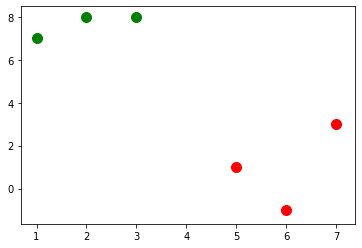

In [4]:
colors = {1:'r',-1:'g'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
[[ax.scatter(x[0],x[1],s=100,color=colors[i]) 
       for x in data_dict[i]] for i in data_dict]
plt.show()

In [6]:
all_data = []
for yi in data_dict:
    print('yi:', yi)
    for featureset in data_dict[yi]:
        print('featureset:', featureset)
        for feature in featureset:
            print('feature:', feature)
            all_data.append(feature)         
all_data

yi: -1
featureset: [1 7]
feature: 1
feature: 7
featureset: [2 8]
feature: 2
feature: 8
featureset: [3 8]
feature: 3
feature: 8
yi: 1
featureset: [5 1]
feature: 5
feature: 1
featureset: [ 6 -1]
feature: 6
feature: -1
featureset: [7 3]
feature: 7
feature: 3


[1, 7, 2, 8, 3, 8, 5, 1, 6, -1, 7, 3]

In [7]:
max_feature_value = max(all_data)
min_feature_value = min(all_data)
print(max_feature_value, min_feature_value)

8 -1


In [9]:
data  = data_dict

In [14]:
# 参数字典 { ||w||: [w,b] }
opt_dict = {}

# 数据转换列表
transforms = [[1,1],
              [-1,1],
              [-1,-1],
              [1,-1]]

# 从字典中获取所有数据
all_data = []
for yi in data:
    for featureset in data[yi]:
        for feature in featureset:
            all_data.append(feature)

In [29]:
w = np.array([latest_optimum,latest_optimum]) #[80, 80]
for transformation in transforms:
     print(w*transformation)

[80 80]
[-80  80]
[-80 -80]
[ 80 -80]


In [15]:
all_data

[1, 7, 2, 8, 3, 8, 5, 1, 6, -1, 7, 3]

In [16]:
max_feature_value = max(all_data)
min_feature_value = min(all_data)
all_data = None

In [17]:
step_sizes = [max_feature_value * 0.1,
              max_feature_value * 0.01,
              max_feature_value * 0.001
              ]

In [18]:
step_sizes

[0.8, 0.08, 0.008]

In [19]:
# 参数b的范围设置
b_range_multiple = 2
b_multiple = 5
latest_optimum = max_feature_value*10

In [20]:
latest_optimum

80

In [26]:
for b in np.arange(-1*(max_feature_value*b_range_multiple),
                               max_feature_value*b_range_multiple,
                               0.8*b_multiple):
    print(b)

-16.0
-12.0
-8.0
-4.0
0.0
4.0
8.0
12.0


In [34]:
b = -16
print(w)
transformation

[ 0.232 -0.232]


[1, -1]

In [33]:
w_t

array([ 80, -80])

In [32]:
def train(data):
    # 参数字典 { ||w||: [w,b] }
    opt_dict = {}

    # 数据转换列表
    transforms = [[1,1],
                  [-1,1],
                  [-1,-1],
                  [1,-1]]

    # 从字典中获取所有数据
    all_data = []
    for yi in data:
        for featureset in data[yi]:
            for feature in featureset:
                all_data.append(feature)

    # 获取数据最大最小值
    max_feature_value = max(all_data)
    min_feature_value = min(all_data)
    all_data = None

    # 定义一个长列表
    step_sizes = [max_feature_value * 0.1,
                  max_feature_value * 0.01,
                  max_feature_value * 0.001
                  ]


    # 参数b的范围设置
    b_range_multiple = 2
    b_multiple = 5
    latest_optimum = max_feature_value*10

    # 基于不同步长训练优化
    for step in step_sizes: #步长从大到小优化
        w = np.array([latest_optimum,latest_optimum]) #[80, 80]
        # 凸优化
        optimized = False #优化完成判断器
        while not optimized:
            for b in np.arange(-1*(max_feature_value*b_range_multiple),
                               max_feature_value*b_range_multiple,
                               step*b_multiple): # 先从稀疏的间隔搜寻
                for transformation in transforms: # 系数的正负搜索，因为初始设置的是正数
                    w_t = w * transformation
                    found_option = True

                    for i in data:
                        for xi in data[i]:
                            yi=i
                            if not yi*(np.dot(w_t,xi)+b) >= 1: 
                                #if not 表示后面为false时通过,这里只有所有的都>=1时才满足条件，进入下一步选最大间隔
                                found_option = False
                                # print(xi,':',yi*(np.dot(w_t,xi)+b))

                    if found_option:
                        opt_dict[np.linalg.norm(w_t)] = [w_t,b] #将通过的参数加入备选名单
                        #np.linalg.norm(求范数)

            if w[0] < 0:
                optimized = True
                print('Optimized a step!')
            else:
                w = w - step

        norms = sorted([n for n in opt_dict]) #
        #||w|| : [w,b]
        opt_choice = opt_dict[norms[0]] #找到使得w平方和最小时的参数
        w = opt_choice[0]
        b = opt_choice[1] #获取最优参数
        latest_optimum = opt_choice[0][0]+step*2 #缩小范围，在更小的step里搜索

    for i in data:
        for xi in data[i]:
            yi=i
            print(xi,':',yi*(np.dot(w,xi)+b)) 
    return w, b
            
    
w, b = train(data_dict)
# 基本上都是刚好大于1

Optimized a step!
Optimized a step!
Optimized a step!
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


In [5]:
def train(data):
    # 参数字典 { ||w||: [w,b] }
    opt_dict = {}
    # 数据转换列表
    transforms =  [[1,1],          
                  [-1,1],
                  [-1,-1],
                  [1,-1]]
    # 从字典中获取所有数据
    all_data = []
    for yi in data:
        for featureset in data[yi]:
            for feature in featureset:
                all_data.append(feature)

    # 获取数据最大最小值
    max_feature_value = max(all_data)
    min_feature_value = min(all_data)
    all_data = None

    # 定义一个步长列表
    step_sizes = [max_feature_value * 0.1,
                  max_feature_value * 0.01,
                  max_feature_value * 0.001
                  ]

    # 参数b的范围设置
    b_range_multiple = 2
    b_multiple = 5
    latest_optimum = max_feature_value*10

    # 基于不同步长训练优化
    for step in step_sizes:
        w = np.array([latest_optimum,latest_optimum])
        # 凸优化
        optimized = False
        while not optimized:
            for b in np.arange(-1*(max_feature_value*b_range_multiple),
                               max_feature_value*b_range_multiple,
                               step*b_multiple):
                for transformation in transforms:
                    w_t = w*transformation
                    found_option = True

                    for i in data:
                        for xi in data[i]:
                            yi=i
                            if not yi*(np.dot(w_t,xi)+b) >= 1:
                                found_option = False
                                
                    if found_option:
                         opt_dict[np.linalg.norm(w_t)] = [w_t,b]
            if w[0] < 0:
                optimized = True
                print('Optimized a step!')
            else:
                w = w - step
        norms = sorted([n for n in opt_dict])
        #||w|| : [w,b]
        opt_choice = opt_dict[norms[0]]
        w = opt_choice[0]
        b = opt_choice[1]
        latest_optimum = opt_choice[0][0]+step*2

    for i in data:
        for xi in data[i]:
            yi=i
            print(xi,':',yi*(np.dot(w,xi)+b))
    return w, b